In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
people_df = pd.read_csv("../output/persons.csv", sep = ";", encoding = "utf8")
locations_df = pd.read_csv("../output/locations.csv", sep = ";", encoding = "utf8")
voyages_df = pd.read_csv("../output/voyages.csv", sep = ";", encoding = "utf8")
ships_df = pd.read_csv("../output/ships.csv", sep = ";", encoding = "utf8")
calls_df = pd.read_csv("../output/calls.csv", sep = ";", encoding = "utf8")

## Women & Lascars

How many mothers are in the data, how many employees are in the data, what is the ratio of the two?

In [3]:
mothers_df = people_df[people_df["mother_name"].notna()]
len(mothers_df.index), len(people_df.index), len(mothers_df.index) / len(people_df.index)

(730, 11991, 0.06087899257776666)

For how many mothers do we have data on their place of birth?

In [4]:
mothers_origin_df = people_df[people_df["mother_origin"].notna()]
len(mothers_origin_df.index), len(people_df.index), len(mothers_origin_df.index) / len(people_df.index)

(78, 11991, 0.006504878658994246)

In [5]:
mothers_df["mother_name"]

2                  Hannah
5               Elizabeth
10       Katharine Forbes
27                   Mary
33                   Mary
               ...       
11896                 Amy
11902                 Ann
11913           Mary Anne
11930                Mary
11956                Mary
Name: mother_name, Length: 730, dtype: object

What information do we have on Lascars?

In [10]:
ships_df.loc[ships_df["raw"].str.contains("lascar", case = False)]["raw"].tolist()

["['Built by Barnard, launched 1772, 3 decks, 4in bottom, length 136ft Tin, keel 110ft, breadth 36ft, hold 14ft 51/2in, wing transom 23ft 2in, between decks 6ft 2in, 763 tons. Principal Managing Owner: George Willson. Voyage 4: From an initial Lascar 141 crew, 97 either died, deserted or were pressed', '*']",
 "['Built by Dudman, launched 1769, 3 decks, 4in bottom, length 140ft 11 in, keel 112ft 9   /4in, breadth 37ft 4in, hold 14ft Sin, wing transom 22ft lOin, between decks 6ft 5in, 836 tons Principal Managing Owner: Mark Cramer', 'Journal 19 Dec 1778-31 Dec 1780, Poynting Journal 10 Jun 1782-21 Jul 1785, Tolme Journal 8 Mar-21 Jul 1785, James Tennant, Chief Mate Ledger Pay Book Ledger (Lascars)']"]

In [11]:
calls_df.loc[calls_df["voyage_id"] == "s35v4"]

,ship_id,voyage_id,call_id,raw,year,month,day,location,special
627,s35,s35v4,s35v4c1,Portsmouth 6 Feb 1782,1782,2.0,6.0,l18,False
628,s35,s35v4,s35v4c2,28 Apr Rio de Janeiro,1782,4.0,28.0,l68,True
629,s35,s35v4,s35v4c3,5 Sep Bombay,1782,9.0,5.0,l12,False
630,s35,s35v4,s35v4c4,19 Oct Madras,1782,10.0,19.0,l4,False
631,s35,s35v4,s35v4c5,15 Jan 1783 Kedgeree,1783,1.0,15.0,l20,False
632,s35,s35v4,s35v4c6,13 May Ingeli,1783,5.0,13.0,l71,False
633,s35,s35v4,s35v4c7,6 Sep Bombay,1783,9.0,6.0,l12,False
634,s35,s35v4,s35v4c8,9 Jan 1784 Cochin,1784,1.0,9.0,l46,False
635,s35,s35v4,s35v4c9,18 Apr Bombay 18 Nov,1784,11.0,18.0,l12,False
636,s35,s35v4,s35v4c10,9 Dec Anjengo,1784,12.0,9.0,l28,False


How many employees in our data were born in India?

In [14]:
birth_locations_df = people_df.loc[people_df["birth_location"].notna()]
birth_locations_df = pd.merge(birth_locations_df, locations_df,
                             how = "left",
                             left_on = "birth_location",
                             right_on = "location_id")
indians_df = birth_locations_df.loc[birth_locations_df["region"].isin(["bombay_presidency", "madras_presidency", "bengal_presidency"])]
indians_df

,person_id,person,raw,last_name,first_name,birth_date,death_date,birth_location,baptised_parish,baptised_city,mother_name,mother_origin,father_name,father_job,location_id,location,category,lat,lon,region
2,p16,"Adams, Frederick (1774-)",b 1774 Calcutta; midshipman SWALLOW (3) 1787/8...,Adams,Frederick,1774,NaN,l8,NaN,NaN,NaN,NaN,NaN,NaN,l8,Calcutta,calls,22.34030,88.22120,bengal_presidency
52,p342,"Anderson, Robert ( 1808-)",b 8 May 1808 Mirzapur; midshipman MINERVA (7) ...,Anderson,Robert,1808,NaN,l1734,NaN,NaN,NaN,NaN,NaN,NaN,l1734,Mirzapur,persons_birth,24.10287,90.09841,bengal_presidency
327,p2362,"Campbell, Archibald Henry (1788-)",b 7 Apr 1788 Madras; midshipman ADMIRAL GARDNE...,Campbell,Archibald Henry,1788,NaN,l4,NaN,NaN,NaN,NaN,NaN,NaN,l4,Madras,calls,13.45700,80.16300,madras_presidency
580,p4112,"Fortnom, Thomas William (1772-)",b 10 Jul 1772 Calcutta,Fortnom,Thomas William,1772,NaN,l8,NaN,NaN,NaN,NaN,NaN,NaN,l8,Calcutta,calls,22.34030,88.22120,bengal_presidency
729,p5234,"Horsman, John Dalrymple (1808-)",b Feb 1808 Madras; midshipman ATLAS (4) 1822/3...,Horsman,John Dalrymple,1808,NaN,l4,NaN,NaN,NaN,NaN,NaN,NaN,l4,Madras,calls,13.45700,80.16300,madras_presidency
1358,p10159,"Stevenson, William Murray (1810-)","b 2 Feb 1810 Vellore, Madras; 6th mate WILLIAM...",Stevenson,William Murray,1810,NaN,l2403,NaN,NaN,NaN,NaN,NaN,NaN,l2403,Vellore,persons_birth,12.91840,79.13255,madras_presidency
1517,p11480,"Ward, David James (1802-)",b 27 Oct 1802 Bengal; midshipman ASIA (6) 1817...,Ward,David James,1802,NaN,l2,NaN,NaN,NaN,NaN,NaN,NaN,l2,Bengal,calls,21.36230,88.09320,bengal_presidency


## When were people born?

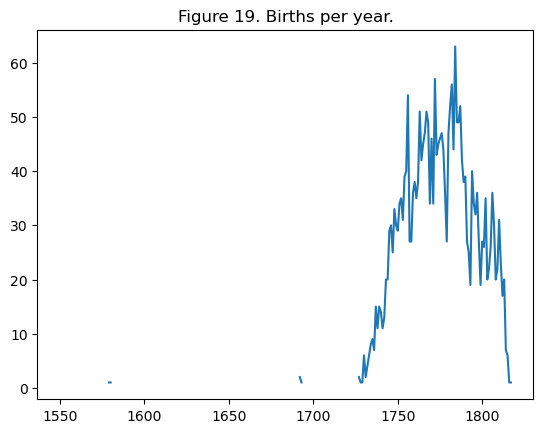

In [20]:
birth_date_df = pd.DataFrame(people_df["birth_date"].value_counts()).reset_index().rename(columns = {
                                                                                        "birth_date": "count", 
                                                                                        "index": "birth_date"
                                                                                        })
birth_date_df = birth_date_df.loc[birth_date_df["birth_date"].str.len() == 4]
birth_date_df = birth_date_df.sort_values("birth_date")
birth_date_df["birth_date"] = birth_date_df["birth_date"].astype("int64")
birth_date_range = range(1550, 1850)
birth_date_graph_df = pd.DataFrame(birth_date_range).rename(columns = {0: "year"})
birth_date_graph_df = pd.merge(birth_date_graph_df, birth_date_df,
                              how = "left",
                              left_on = "year",
                              right_on = "birth_date"
                              )
birth_date_graph_df.drop(columns = "birth_date", inplace = True)
plt.plot(birth_date_graph_df['year'], birth_date_graph_df['count'])
plt.title('Figure 19. Births per year.')
plt.savefig("people/births_per_year.png",
            dpi = 300,
            facecolor = "white",
            bbox_inches = "tight")
plt.show()

How many people in our data were born before 1720?

In [16]:
birth_date_graph_df.loc[birth_date_graph_df["year"] < 1720]["count"].sum()

13.0

## Where were people born?

Count births per location

In [17]:
birth_locations_counts_df = pd.DataFrame(people_df["birth_location"].value_counts()).reset_index().rename(columns = {
                                                                                        "birth_location": "count", 
                                                                                        "index": "location_id"
                                                                                        })
birth_locations_counts_df = pd.merge(birth_locations_counts_df, locations_df,
                            how = "left",
                            on = "location_id")
birth_locations_counts_df = birth_locations_counts_df.loc[birth_locations_counts_df["location"].notna()]
birth_locations_counts_df = birth_locations_counts_df.loc[birth_locations_counts_df["lat"].notna()]
# Filter out large 
birth_region_df = birth_locations_counts_df.loc[birth_locations_counts_df["location"].isin(["England", "Scotland", "Ireland", "Wales",
                                                                         "West Indies", "America"])]
birth_region_df.to_csv("people/birth_region.csv", index = False, sep = ";", encoding = "utf8")
birth_locations_counts_df = birth_locations_counts_df.loc[~birth_locations_counts_df["location"].isin(birth_region_df["location"].tolist())]
birth_locations_counts_df.to_csv("people/birth_location.csv", index = False, sep = ";", encoding = "utf8")

In [18]:
birth_locations_counts_df

,location_id,count,location,category,lat,lon,region
6,l1710,23,Edinburgh,persons_birth,55.95206,-3.19648,british_isles
7,l1460,14,London,calls,51.50853,-0.12574,british_isles
8,l1726,10,Glasgow,persons_birth,55.86515,-4.25763,british_isles
10,l1897,7,Aberdeen,persons_birth,57.14369,-2.09814,british_isles
12,l890,7,Dublin,calls,53.33306,-6.24889,british_isles
...,...,...,...,...,...,...,...
834,l1996,1,Wormley,persons_birth,51.13622,-0.64673,british_isles
835,l2007,1,Enniskillen,persons_birth,54.34615,-7.64133,british_isles
840,l2001,1,Neath,persons_birth,51.66317,-3.80443,british_isles
841,l2002,1,Margate,persons_birth,51.38132,1.38617,british_isles


For how many employees do we have a birth location?

In [19]:
len(people_df.loc[people_df["birth_location"].notna()].index), len(people_df.index), (len(people_df.loc[people_df["birth_location"].notna()].index) / len(people_df.index))

(1587, 11991, 0.13234926194645985)